# Figure S12. Robustness of the findings to the inclusion of inter-hemispheric connections in the cost function

In [1]:
import set_env  # not included in the repo, defines $PROJECT_DIR, $PNC_PROJECT_DIR, $IMAGEN_PROJECT_DIR & $INPUT_DIR

In [2]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

OUTPUT_DIR = {
    "pnc": os.path.join(os.environ["PNC_PROJECT_DIR"], "output"),
    "imagen": os.path.join(os.environ["IMAGEN_PROJECT_DIR"], "output"),
    "micamics": os.path.join(os.environ["PROJECT_DIR"], "output", "micamics")
}
INPUT_DIR = os.environ["INPUT_DIR"]
CODE_DIR = os.path.join(os.getcwd(), "..", "scripts")
sys.path.append(CODE_DIR)
from utils import transform, plot

import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'font.size': 16, "font.family": "Asana Math", "figure.dpi": 300})
thcolor = '#44546A'
add_text = True # add statistics as text to some figures

/data/project/ei_development/env/lib/python3.10/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


Load data:

In [3]:
all_stats = {}
all_ICCs_by_age = {}
all_data = {}
all_I_E = {}
for alt in ['main', 'inter']:
    all_stats[alt] = pd.read_csv(f"p_pnc200_{alt}_IE_age_stats.csv", index_col=0)
    all_data[alt] = pd.read_csv(f"pnc200_{alt}_data.csv", index_col=0)
    all_I_E[alt] = pd.read_csv(f"pnc200_{alt}_IE.csv", index_col=0)
    if alt != 'main':
        all_ICCs_by_age[alt] = pd.read_csv(f"p_pnc200_{alt}_IE_icc.csv", index_col=0)

## A. Effect of age on E-I ratio with inter-hemispheric connections in cost

### (left) FDR-significant effects

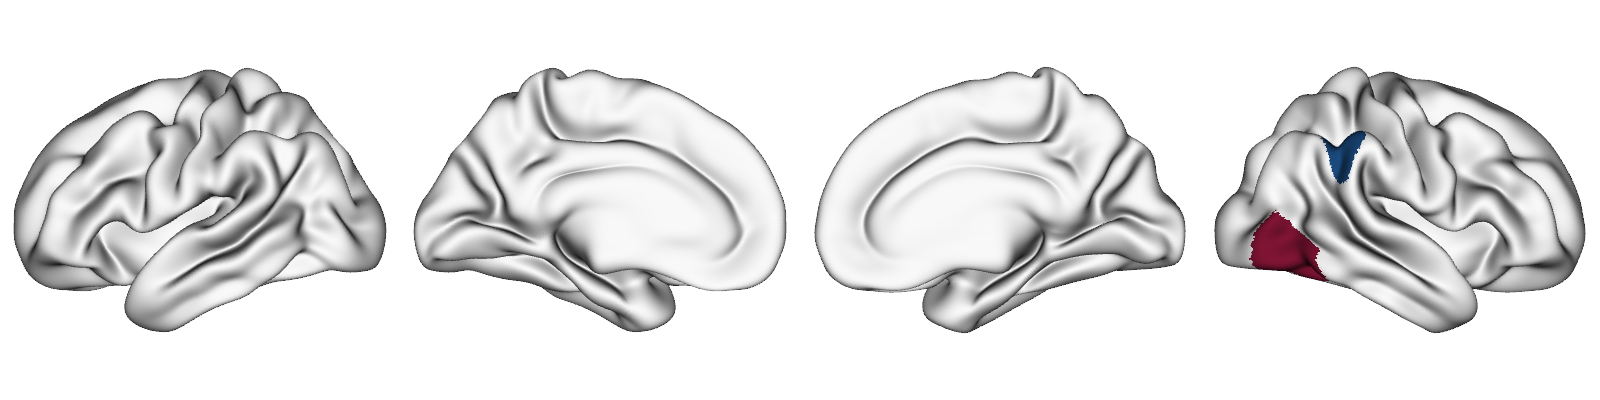

In [4]:
vmin = min(all_stats['inter']['t'].values.min(), -all_stats['inter']['t'].values.max()).round(2)
vmax = -vmin
plot.plot_surface(
    transform.deparcellate_surf(
        all_stats['inter']['t'][all_stats['inter']['p_fdr']<0.05], 
        'schaefer-100', concat=True, space='fsaverage'
    ), 
    'fsaverage', mesh_kind='semi-inflated',
    vrange=(vmin, vmax), cmap='RdBu_r', cbar=False,
    layout_style='row',
)

### (right) Comparison with main age effect map

permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Correlation coefficient: 0.7339708695446305 ; p-vlaue: 0.0
permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000
Cosine similarity: 0.5318152224809611 ; p-vlaue: 0.0


Text(0, 0.5, 'E-I ratio age effect\n(Interhemispheric excluded)')

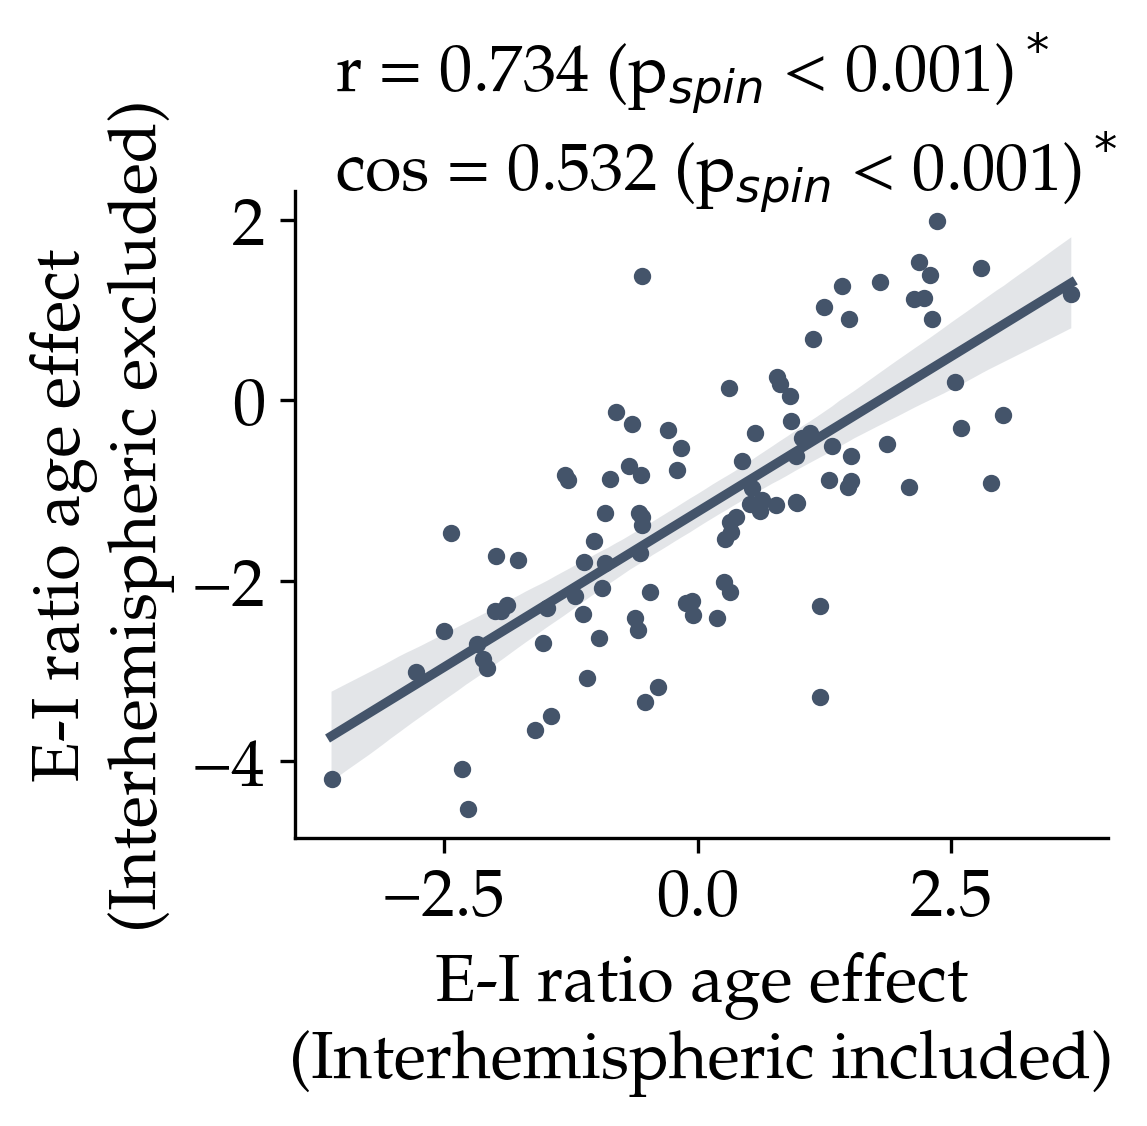

In [5]:
ax = plot.reg_plot(
    all_stats['inter'][['t']], all_stats['main'][['t']], 'schaefer-100',
    xlabel='E-I ratio age effect''\n(Interhemispheric included)',
    ylabel='E-I ratio age effect''\n(Interhemispheric excluded)'
)
ax.set_xlabel(ax.get_xlabel(), fontsize=16)
ax.set_ylabel(ax.get_ylabel(), fontsize=16)

## S12B. ICC

       younger    older      all
count  100.000  100.000  100.000
mean     0.440    0.490    0.484
std      0.154    0.164    0.128
min      0.069    0.077    0.071
25%      0.315    0.381    0.410
50%      0.477    0.513    0.497
75%      0.553    0.618    0.572
max      0.776    0.804    0.743
T =-2.833498447845943, p = 0.005580164363852874


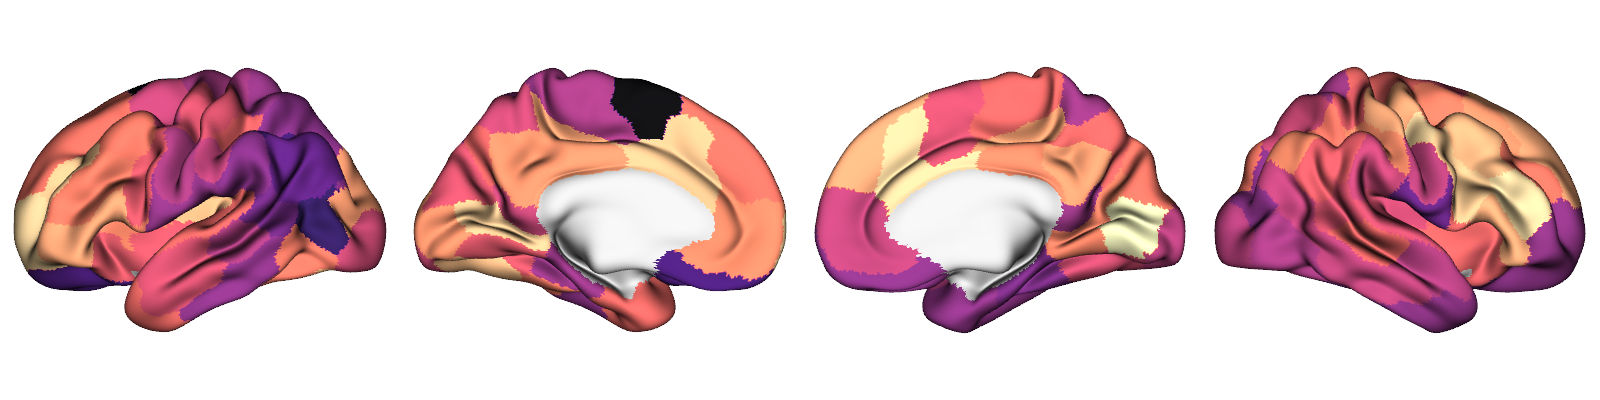

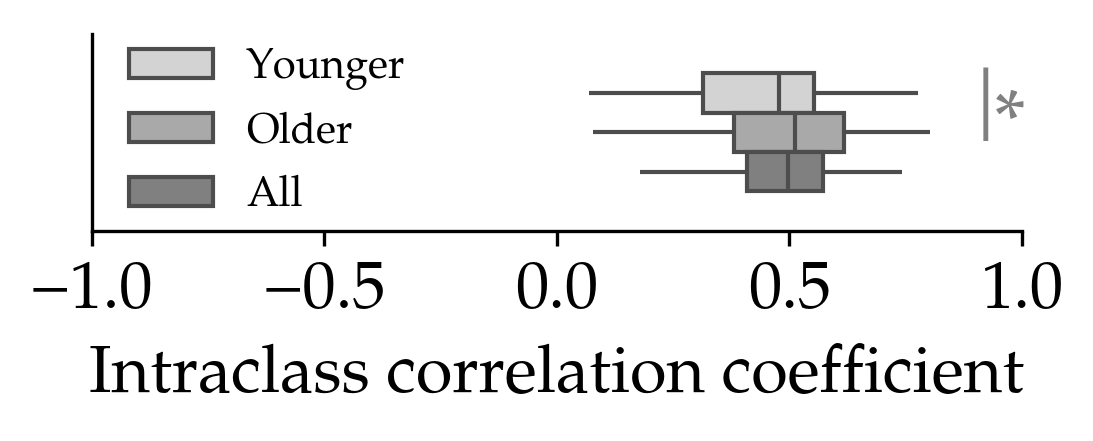

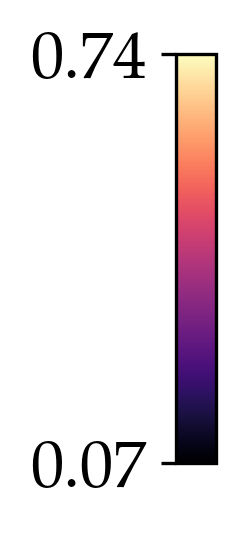

In [6]:
print(all_ICCs_by_age['inter'].describe().round(3))
plot.plot_icc_by_age(all_ICCs_by_age['inter'], 'schaefer-100')

## S12C. Comparison of GOF

In [7]:
gof_labels = {    
    'gof': 'Goodness-of-fit',
    'fc_corr': 'FC correlation',
    'sc_fc': 'SC-FC coupling',
    'fc_diff': 'FC difference',
    'fcd_ks': 'FCD KS distance',
}

Goodness-of-fit	-21.85	0.0	-0.145	0.094
FC correlation	-28.167	0.0	-0.11	0.055
SC-FC coupling	-75.831	0.0	-0.076	0.014
FC difference	7.059	0.0	0.033	0.067
FCD KS distance	0.995	0.321	0.002	0.023


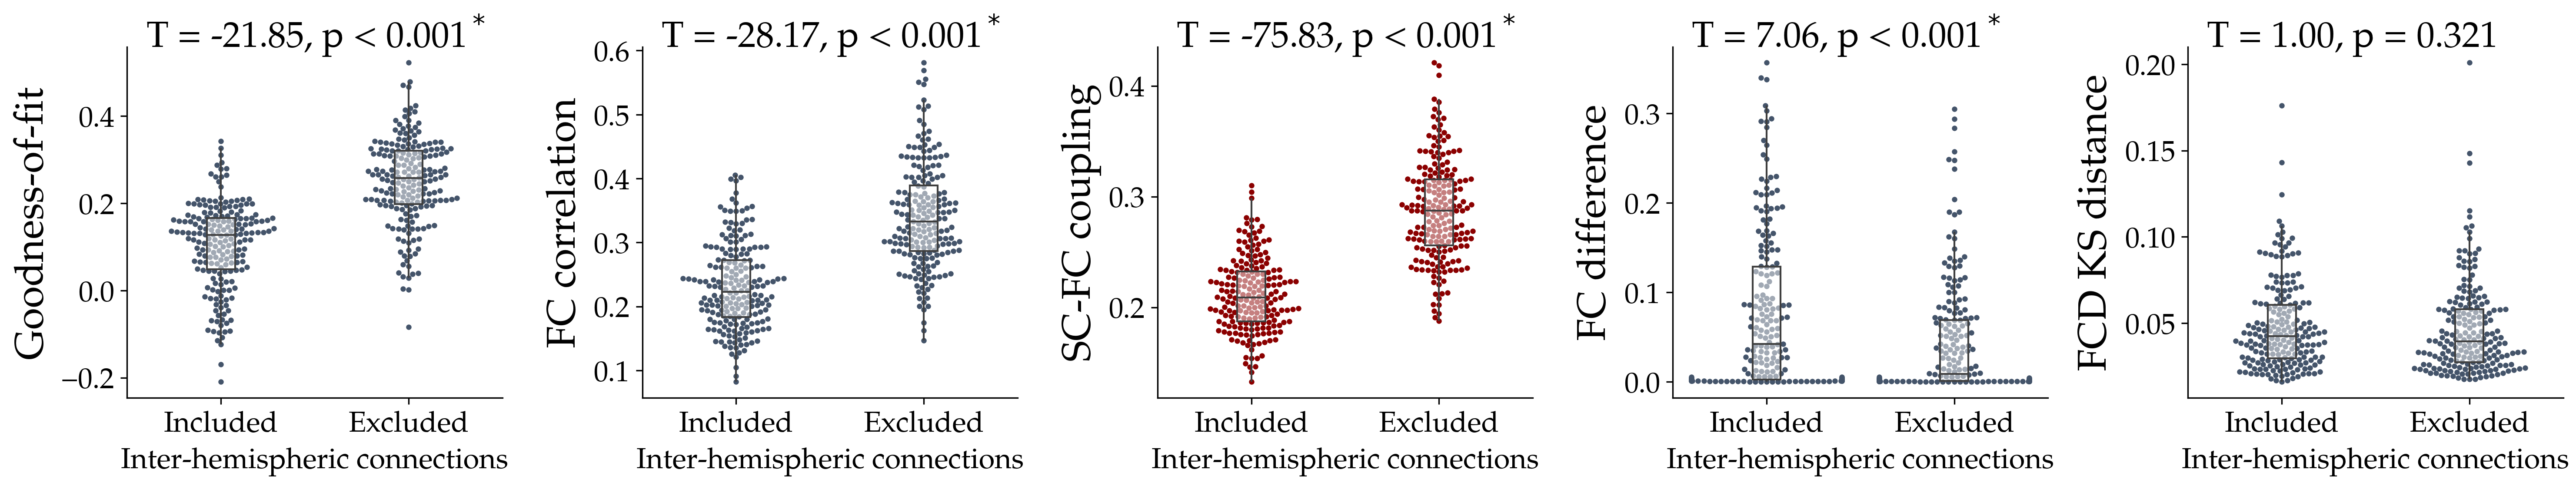

In [8]:
all_data['inter']['Inter-hemispheric connections'] = 'Included'
all_data['main']['Inter-hemispheric connections'] = 'Excluded'
data_combined = pd.concat([all_data['inter'], all_data['main']], axis=0)
gof_measures = ['gof','fc_corr', 'sc_fc', 'fc_diff', 'fcd_ks']
fig, axd = plt.subplot_mosaic(
    [gof_measures],
    gridspec_kw=dict(width_ratios=[1]*5, height_ratios=[1]), 
    figsize=(20, 4)
)

for i, col in enumerate(gof_measures):
    label = gof_labels[col]
    ax = axd[col]
    if col == 'sc_fc':
        color = 'darkred'
    else:
        color= '#44546A'
    sns.swarmplot(
        data=data_combined,
        x='Inter-hemispheric connections', y=col,
        s=3, color=color,
        ax=ax
    )
    sns.boxplot(
        data=data_combined,
        x='Inter-hemispheric connections', y=col,
        showfliers=False,
        showcaps=False, width=0.15,
        boxprops={"facecolor": (1, 1, 1, 0.5)},
        ax=ax)
    plt.setp(ax.collections, zorder=0, label="") # puts swarm in the back
    ax.set_ylabel(label, fontsize=22)
    sns.despine()
    # add statistics
    alt = all_data['inter'].loc[:, col]
    main = all_data['main'].loc[:, col]
    t, p = scipy.stats.ttest_rel(alt, main)
    if add_text:
        if p > 0.001:
            text = f'T = {t:.2f}, p = {p:.3f}'
        else:
            text = f'T = {t:.2f}, p < 0.001'
        if p < 0.05:
            text+=r'$^*$'
        text_x = ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*0.05
        text_y = ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*1
        ax.text(text_x, text_y, 
                text,
                color='black',
                size=20,
                multialignment='left')
    mean_diff = (alt - main).mean()
    sd_diff = (alt - main).std()
    print(label, round(t, 3), round(p,3), round(mean_diff,3), round(sd_diff,3), sep="\t")
fig.tight_layout(pad=1.0)